In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read
Product data:

In [2]:
df = pd.read_csv('../data/ammonia_DE.csv', index_col=0, sep=';')
df.index = df.index.map(lambda x: pd.to_datetime(x, format='%d.%m.%Y'))

In [3]:
df['Ammonia avg. value of trades EUR/t'] = 10 * (
    df['Ammonia import value, EUR'] + df['Ammonia export value, EUR']
) / (
    df['Ammonia imports, t'] + df['Ammonia exports, t']
)

Gas prices:

In [4]:
gas = pd.read_csv('../data/gas_prices_TTF.csv', index_col=0, parse_dates=True)['Price']

In [6]:
gasm = gas.resample('1m', label='left').mean()
gasm.index = gasm.index + pd.Timedelta('1d')

In [7]:
df['Natural gas price TTF, EUR/MWh'] = gasm

In [18]:
gas_old = pd.read_csv('../data/Dutch TTF Natural Gas Futures Historical Data.csv', index_col=0)['Price']
gas_old.index = pd.to_datetime(gas_old.index)
gas_mean = gas_old[gas_old.index.year.isin([2019, 2020])].mean()

# Plot

85.86095833333349
-183.3340416666665
-92.559
182.504


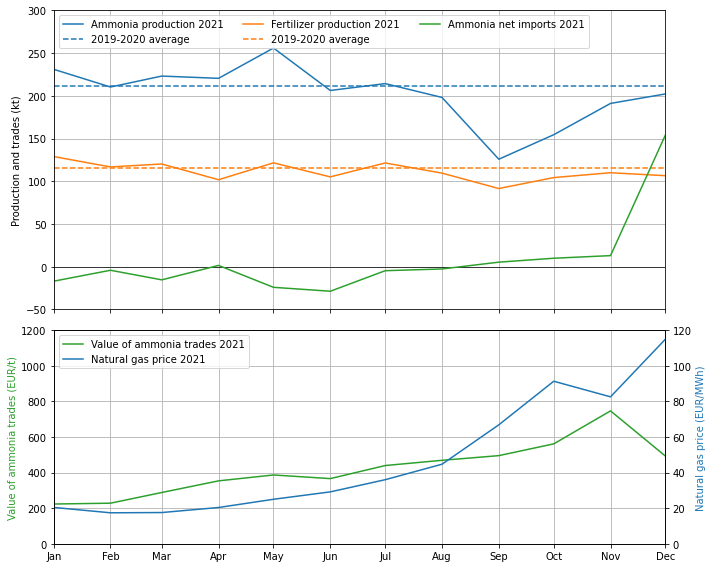

In [58]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10,8), sharex='col', gridspec_kw={'height_ratios': [4.2,3]})

dfa = df.iloc[:24]/1000
dfx = df.iloc[24:]/1000
x = dfx.index

ax.axhline(0, color='black', linewidth=0.7)

ax.plot(x, dfx['Ammonia production DE, t'], label='Ammonia production 2021')
ax.axhline(dfa['Ammonia production DE, t'].mean(), linestyle='--', label='2019-2020 average')

print((dfx['Ammonia production DE, t'] - dfa['Ammonia production DE, t'].mean()).iloc[:5].sum())
print((dfx['Ammonia production DE, t'] - dfa['Ammonia production DE, t'].mean()).iloc[7:].sum())

ax.plot(x, dfx['Fertiliser production DE, t'], label='Fertilizer production 2021')
ax.axhline(dfa['Fertiliser production DE, t'].mean(), linestyle='--', color='tab:orange', label='2019-2020 average')

ax.plot(x, dfx['Ammonia net imports DE, t'], color='tab:green', label='Ammonia net imports 2021')

print(dfx['Ammonia net imports DE, t'].iloc[:7].sum())
print(dfx['Ammonia net imports DE, t'].iloc[8:].sum())

ax.set_xlim(x[0], x[-1])
ax.set_xticklabels([])
ax.set_ylim(-50,300)
ax.set_ylabel('Production and trades (kt)')

ax.legend(ncol=3, loc='upper left')
ax.grid()

dfa = df.iloc[:24]
dfx = df.iloc[24:]
x = dfx.index

plt.axhline(0, color='black', linewidth=0.7)
#plt.axhline(dfa['Ammonia import prices DE, EUR/t'].mean(), linestyle='--')

handle_1, = ax1.plot(x, dfx['Ammonia avg. value of trades EUR/t'], color='tab:green')
#ax.axhline(dfa['Ammonia avg. value of trades EUR/t'].mean(), linestyle='--', color='tab:green')

plt.xlim(x[0], x[-1])
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0, 1200)
plt.ylabel('Value of ammonia trades (EUR/t)', color='tab:green')

ax2 = ax1.twinx()
#handle_2, = ax2.plot(gas.index, gas) #
handle_2, = ax2.plot(x, dfx['Natural gas price TTF, EUR/MWh'])
#ax2.axhline(gas_mean, linestyle='--', color='tab:blue')
plt.ylim(0, 120)
plt.ylabel('Natural gas price (EUR/MWh)', color='tab:blue')

plt.legend([handle_1, handle_2], ['Value of ammonia trades 2021', 'Natural gas price 2021'])
ax1.grid()

plt.tight_layout()
plt.savefig(f'Ammonia.png', dpi=300)

In [49]:
(dfx['Ammonia production DE, t'] - dfa['Ammonia production DE, t'].mean())#.iloc[:5].sum()

2021-01-01    20036.791667
2021-02-01     -697.208333
2021-03-01    12127.791667
2021-04-01     9456.791667
2021-05-01    44936.791667
2021-06-01    -4736.208333
2021-07-01     3295.791667
2021-08-01   -12898.208333
2021-09-01   -85220.208333
2021-10-01   -56521.208333
2021-11-01   -19899.208333
2021-12-01    -8795.208333
Name: Ammonia production DE, t, dtype: float64

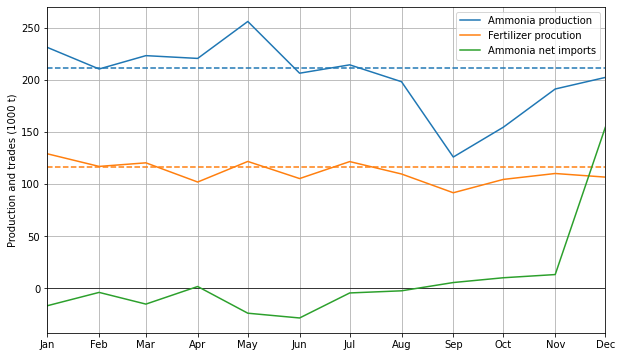

In [23]:
fig = plt.figure(figsize=(10, 6))

dfa = df.iloc[:24]/1000
dfx = df.iloc[24:]/1000
#dfx = df/1000
x = dfx.index

plt.axhline(0, color='black', linewidth=0.7)

plt.plot(x, dfx['Ammonia production DE, t'], label='Ammonia production')
plt.axhline(dfa['Ammonia production DE, t'].mean(), linestyle='--')

plt.plot(x, dfx['Fertiliser production DE, t'], label='Fertilizer procution')
plt.axhline(dfa['Fertiliser production DE, t'].mean(), linestyle='--', color='tab:orange')

plt.plot(x, dfx['Ammonia net imports DE, t'], color='tab:green', label='Ammonia net imports')
#plt.axhline(dfa['Ammonia net imports DE, t'].mean(), linestyle='--', color='tab:green')

plt.xlim(x[0], x[-1])
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Production and trades (1000 t)')

plt.legend()
plt.grid()

plt.savefig(f'Ammonia production and trades.png', dpi=300)

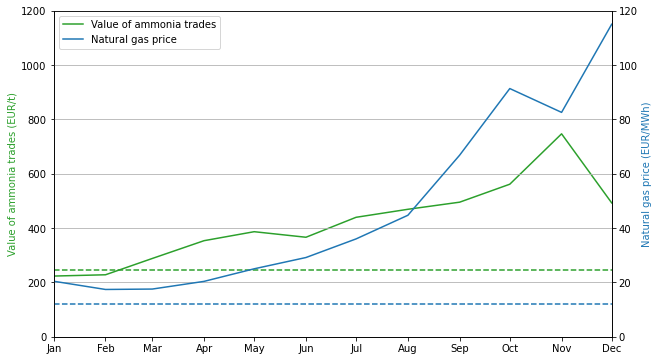

In [22]:
fig = plt.figure(figsize=(10, 6))


dfa = df.iloc[:24]
dfx = df.iloc[24:]
x = dfx.index


ax = fig.add_subplot(111)
plt.axhline(0, color='black', linewidth=0.7)
#plt.axhline(dfa['Ammonia import prices DE, EUR/t'].mean(), linestyle='--')

handle_1, = ax.plot(x, dfx['Ammonia avg. value of trades EUR/t'], color='tab:green')
#ax.axhline(dfa['Ammonia avg. value of trades EUR/t'].mean(), linestyle='--', color='tab:green')

plt.xlim(x[0], x[-1])
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0, 1200)
plt.ylabel('Value of ammonia trades (EUR/t)', color='tab:green')

ax2 = ax.twinx()
#handle_2, = ax2.plot(gas.index, gas) #
handle_2, = ax2.plot(x, dfx['Natural gas price TTF, EUR/MWh'])
#ax2.axhline(gas_mean, linestyle='--', color='tab:blue')
plt.ylim(0, 120)
plt.ylabel('Natural gas price (EUR/MWh)', color='tab:blue')

plt.legend([handle_1, handle_2], ['Value of ammonia trades', 'Natural gas price'])
plt.grid()